In [322]:
#pip install pandas-datareader
#!pip install keras
#!pip install tensorflow
import keras

In [3]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 6, 30)

In [4]:
axisgold = web.DataReader("AXISGOLD.NS", 'yahoo', start, end)
bslgoldetf = web.DataReader("BSLGOLDETF.NS", 'yahoo', start, end)
#cangold = web.DataReader("CANGOLD.BO", 'yahoo', start, end)
#hfcmgetf = web.DataReader("HFCMFGETF.BO", 'yahoo', start, end)
#ipgetf = web.DataReader("IPGETF.BO", 'yahoo', start, end)
idbigold = web.DataReader("IDBIGOLD.NS", 'yahoo', start, end)
kotakgold = web.DataReader("KOTAKGOLD.NS", 'yahoo', start, end)
qgoldhalf = web.DataReader("QGOLDHALF.NS", 'yahoo', start, end)
#relgold = web.DataReader("RELGOLD.BO", 'yahoo', start, end)
#religarego = web.DataReader("RELIGAREGO.BO", 'yahoo', start, end)
#setfgold = web.DataReader("SETFGOLD.NS", 'yahoo', start, end)
goldshare = web.DataReader("GOLDSHARE.NS", 'yahoo', start, end)
goldbees = web.DataReader("GOLDBEES.NS", 'yahoo', start, end)

In [323]:
axisgold.to_csv('AXISGOLD.csv')
bslgoldetf.to_csv('BSLGOLDETF.csv')
idbigold.to_csv('IDBIGOLD.csv')
kotakgold.to_csv('KOTAKGOLD.csv')
qgoldhalf.to_csv('QGOLDHALF.csv')
#setfgold.to_csv('SETFGOLD.csv')
goldshare.to_csv('GOLDSHARE.csv')
goldbees.to_csv('GOLDBEES.csv')

NameError: name 'goldshare' is not defined

NameError: name 'goldshare' is not defined

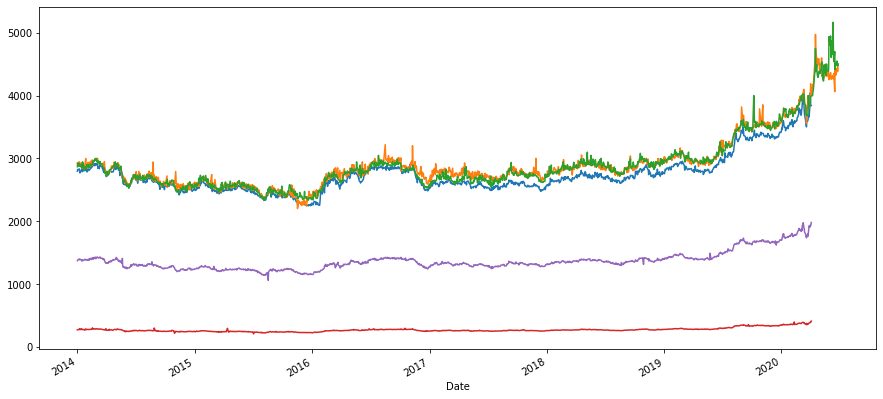

In [324]:
axisgold['Open'].plot(label = 'axisgold', figsize= (15,7))
bslgoldetf['Open'].plot(label = 'bslgoldetf')
idbigold['Open'].plot(label = 'idbigold')
kotakgold['Open'].plot(label = 'kotakgold')
qgoldhalf['Open'].plot(label = 'qgoldhalf')
goldshare['Open'].plot(label = 'goldshare')
goldbees['Open'].plot(label = 'goldbees')
plt.title('Gold ETF stock price')
plt.legend()

In [325]:
#We are going to predict the price of one Gold ETF below. Similarly all other predictions can also be made. Let us chose Axisgold ETF

In [326]:
import numpy as np
import pandas as pd
import json

data = pd.read_csv('AXISGOLD.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

         Date         High          Low         Open        Close  Volume  \
0  2014-01-01  2827.000000  2786.649902  2795.000000  2823.899902   108.0   
1  2014-01-02  2823.899902  2766.500000  2823.899902  2792.949951   262.0   
2  2014-01-03  2830.000000  2800.149902  2819.899902  2806.550049   124.0   
3  2014-01-06  2830.000000  2791.149902  2830.000000  2824.149902   293.0   
4  2014-01-07  2831.600098  2797.149902  2831.600098  2815.000000   322.0   

     Adj Close  
0  2823.899902  
1  2792.949951  
2  2806.550049  
3  2824.149902  
4  2815.000000  


Open   --- mean : 2731.9523660168975   	 Std:  298.14851148276347   	 Max:  4044.199951171875   	 Min:  2245.050048828125
High   --- mean : 2753.576266509314   	 Std:  301.96097404535266   	 Max:  4116.89990234375   	 Min:  2255.25
Low    --- mean : 2711.799835861156   	 Std:  292.5524522290526   	 Max:  3837.85009765625   	 Min:  2230.0
Close  --- mean : 2729.691128709029   	 Std:  296.6061704634843   	 Max:  3958.550048828125  

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1535 non-null   object 
 1   High       1535 non-null   float64
 2   Low        1535 non-null   float64
 3   Open       1535 non-null   float64
 4   Close      1535 non-null   float64
 5   Volume     1535 non-null   float64
 6   Adj Close  1535 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.1+ KB


In [328]:
print("Dataframe contains Data from from " + str(data['Date'].min()) + " to " + str(data['Date'].max()))
data.head()

Dataframe contains Data from from 2014-01-01 to 2020-04-03


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-01,2827.000000,2786.649902,2795.000000,2823.899902,108.0,2823.899902
1,2014-01-02,2823.899902,2766.500000,2823.899902,2792.949951,262.0,2792.949951
2,2014-01-03,2830.000000,2800.149902,2819.899902,2806.550049,124.0,2806.550049
3,2014-01-06,2830.000000,2791.149902,2830.000000,2824.149902,293.0,2824.149902
4,2014-01-07,2831.600098,2797.149902,2831.600098,2815.000000,322.0,2815.000000


In [329]:
df = data.dropna()
df.shape

(1535, 7)

In [330]:
# Select Adjusted close data
df = df[['Adj Close']]
print(df.shape)
df.head(10)

(1535, 1)


,Adj Close
0,2823.899902
1,2792.949951
2,2806.550049
3,2824.149902
4,2815.000000
5,2789.949951
6,2790.449951
7,2813.850098
8,2806.149902
9,2805.649902


<Figure size 864x432 with 0 Axes>

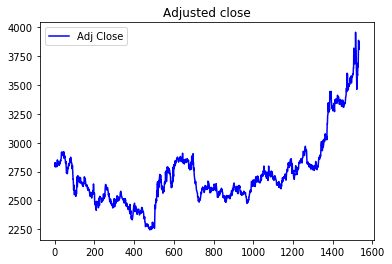

In [331]:
# display the data 
plt.figure(figsize=(12,6))
# all data points
df.plot(title='Adjusted close', color='blue') 
plt.show()

In [332]:
#Preprocessing the data by scaling
#minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#scaler = MinMaxScalar(feature_range=(0,1))
#df = minmaxscaler.fit_transform(df)
#print(df)

In [333]:
#Create a variable to predict x days into the future
future_days = 380
#Create a new columns (target) shifted 'x' days up
df['Prediction'] = df[['Adj Close']].shift(-future_days)
df.tail(4)

,Adj Close,Prediction
1531,3888.699951,NaN
1532,3852.800049,NaN
1533,3807.850098,NaN
1534,3876.100098,NaN


In [334]:
#Create feature dataset (x), convert to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[2823.89990234]
 [2792.94995117]
 [2806.55004883]
 ...
 [2698.89990234]
 [2686.10009766]
 [2701.14990234]]


In [335]:
#Create a target data set (y) and convert to numpy array to get all target values except last x data points
y = np.array(df['Prediction'])[:-future_days]
print(y)

[2381.19995117 2390.         2389.64990234 ... 3852.80004883 3807.85009766
 3876.10009766]


In [336]:
#Split data 80% training 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [337]:
#Create models
#Create decision tree model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create linear decision model
lr = LinearRegression().fit(x_train, y_train)

In [338]:
#Get last x fows of future
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2658.10009766],
       [2646.80004883],
       [2644.5       ],
       [2630.10009766],
       [2614.94995117],
       [2615.64990234],
       [2594.89990234],
       [2581.75      ],
       [2564.94995117],
       [2584.35009766],
       [2582.75      ],
       [2575.55004883],
       [2571.25      ],
       [2601.05004883],
       [2612.75      ],
       [2600.80004883],
       [2609.        ],
       [2608.        ],
       [2593.14990234],
       [2600.        ],
       [2598.        ],
       [2586.19995117],
       [2595.        ],
       [2604.5       ],
       [2594.        ],
       [2587.10009766],
       [2590.        ],
       [2623.30004883],
       [2641.39990234],
       [2634.14990234],
       [2635.5       ],
       [2625.19995117],
       [2605.        ],
       [2620.10009766],
       [2596.05004883],
       [2608.75      ],
       [2584.10009766],
       [2611.05004883],
       [2644.89990234],
       [2627.        ],
       [2601.30004883],
       [2581.5  

In [339]:
#Show tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2704.10009766 2677.85009766 2710.         2705.         2680.27502441
 2725.         2728.85009766 2813.5        2703.39990234 2845.19995117
 2745.         2677.10009766 2818.05004883 2750.85009766 2749.05004883
 2750.85009766 2858.64990234 3281.84997559 2752.         2643.99003906
 2790.         2824.         2821.14990234 2810.80004883 2810.
 2762.84997559 2752.22503662 2810.         3044.44995117 2812.14990234
 2800.10009766 2823.         3322.30004883 2849.80004883 2857.89990234
 2858.64990234 2845.19995117 2858.69995117 2710.         2709.
 2734.14990234 2819.75       2810.         2780.39990234 2750.
 2749.35009766 2759.         2732.75       2862.65002441 2826.
 2795.15002441 2690.         2682.14990234 2705.64990234 2728.10009766
 2720.         2760.         2753.30004883 2694.78328451 2649.
 2784.5        2767.55004883 2525.94995117 2750.         2755.
 2723.         2762.84997559 2630.         2807.94995117 2760.
 2701.19995117 2783.07507324 2824.14990234 2772.64990234 2789.

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


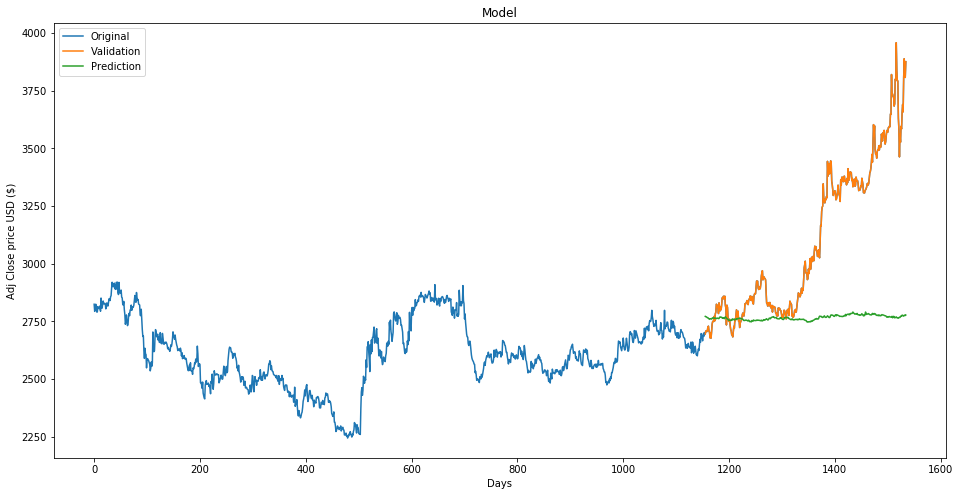

In [340]:
#Visualize data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close price USD ($)')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Original','Validation', 'Prediction'])
plt.show()

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


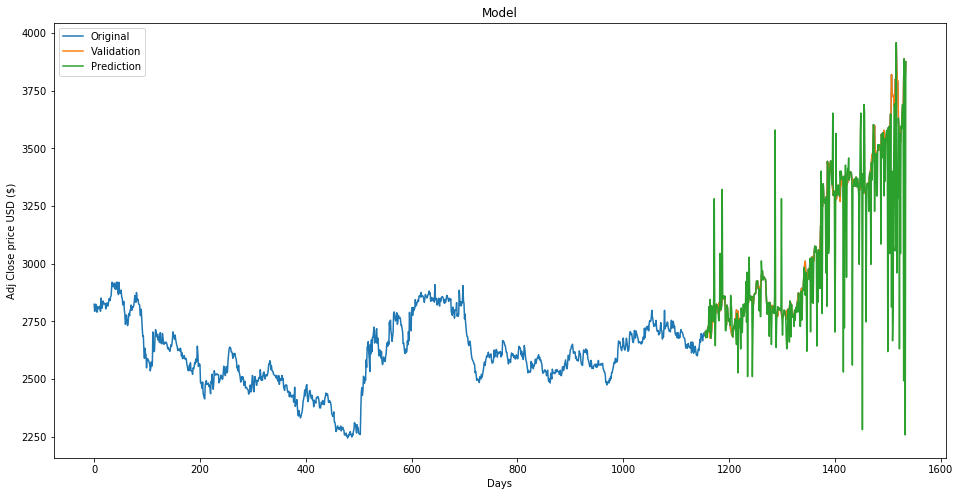

In [341]:
#Visualize data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close price USD ($)')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Original','Validation', 'Prediction'])
plt.show()

In [342]:
#Modeling uing LSTM model
import numpy


In [343]:
data_1 = pd.read_csv('AXISGOLD.csv')


In [344]:
# Select Adjusted close data
data = data_1[['Adj Close']]
print(data_1.shape)
data_1.head(4)

(1535, 7)


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-01,2827.000000,2786.649902,2795.000000,2823.899902,108.0,2823.899902
1,2014-01-02,2823.899902,2766.500000,2823.899902,2792.949951,262.0,2792.949951
2,2014-01-03,2830.000000,2800.149902,2819.899902,2806.550049,124.0,2806.550049
3,2014-01-06,2830.000000,2791.149902,2830.000000,2824.149902,293.0,2824.149902


In [345]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [346]:
print(data)

[[0.33837711]
 [0.32032996]
 [0.32826028]
 ...
 [0.93833639]
 [0.91212574]
 [0.95192282]]


In [347]:
#Split data 80% training 20% testing

training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [348]:
training_size,test_size

(1228, 307)

In [349]:
train_data

array([[0.33837711],
       [0.32032996],
       [0.32826028],
       ...,
       [0.31219564],
       [0.3161608 ],
       [0.31269134]])

In [454]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [455]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [456]:
print(x_train.shape), print(y_train.shape)

(1226, 1)
(1226,)


(None, None)

In [457]:
print(x_test.shape), print(y_test.shape)


(305, 1)
(305,)


(None, None)

In [458]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [459]:
x_train.shape, x_test.shape

((1226, 1, 1), (305, 1, 1))

In [460]:
x_train

array([[[0.33837711]],

       [[0.32032996]],

       [[0.32826028]],

       ...,

       [[0.29761796]],

       [[0.3011166 ]],

       [[0.31219564]]])

In [461]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [462]:
from keras import backend as K
K.set_image_data_format('channels_last')  
keras.backend.image_data_format()  

'channels_last'

In [463]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [464]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_18 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [465]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 76ms/step - loss: 0.0399 - val_loss: 0.2277
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0909
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.1191
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0933
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0816
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0540
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0216
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 3.4076e-04 - val_loss: 0.0109
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 2.1585e-04 - val_loss: 0.0143


In [362]:
import tensorflow as tf

In [363]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [364]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [365]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2628.359222454035

In [366]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

3167.7478070691773

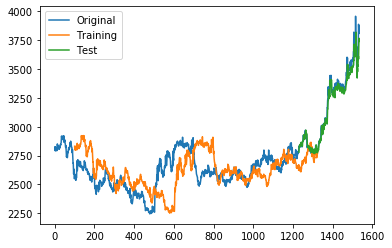

In [367]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)-196:len(data)+100, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()


In [437]:
len(data)

1535

In [484]:
#Predicting to next 30 days data using previous 100 days
x_input=data[1435:].reshape(1,-1)
x_input.shape

(1, 100)

In [485]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [486]:
len(temp_input)

100

In [487]:
temp_input

[0.6387941521275375,
 0.6488817961871667,
 0.6548004216709244,
 0.6368115015656062,
 0.639435484846824,
 0.6599900205496954,
 0.653634206879272,
 0.6498148249645701,
 0.6508060790654338,
 0.6420886519698736,
 0.6257908287285738,
 0.6275401509160523,
 0.6266363059804809,
 0.6298433966575248,
 0.637569569652221,
 0.6361701688463199,
 0.6570452997287326,
 0.6498148249645701,
 0.6412139908761345,
 0.6205136783243064,
 0.6207760481803875,
 0.6197264263958595,
 0.6256450518796173,
 0.6282398513190028,
 0.630513913218643,
 0.63509136321996,
 0.6432840506033581,
 0.6443336723878859,
 0.6399019992355257,
 0.6447126352510912,
 0.6577741839735152,
 0.6708650588979754,
 0.6741303748984793,
 0.682468839130834,
 0.6965217843143254,
 0.7173386898732781,
 0.6978337759549345,
 0.7501676647303304,
 0.7927635461072671,
 0.7633458064598788,
 0.7897314161210118,
 0.7296131290274592,
 0.7179800225925643,
 0.7205165967084894,
 0.7077466016839786,
 0.7240444249252784,
 0.7292340238040496,
 0.727951216005273,


In [488]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[4.689887]
101
1 day input [0.6488818  0.65480042 0.6368115  0.63943548 0.65999002 0.65363421
 0.64981482 0.65080608 0.64208865 0.62579083 0.62754015 0.62663631
 0.6298434  0.63756957 0.63617017 0.6570453  0.64981482 0.64121399
 0.62051368 0.62077605 0.61972643 0.62564505 0.62823985 0.63051391
 0.63509136 0.64328405 0.64433367 0.639902   0.64471264 0.65777418
 0.67086506 0.67413037 0.68246884 0.69652178 0.71733869 0.69783378
 0.75016766 0.79276355 0.76334581 0.78973142 0.72961313 0.71798002
 0.7205166  0.7077466  0.72404442 0.72923402 0.72795122 0.7392344
 0.72850514 0.73996329 0.73658123 0.73611472 0.76891451 0.75830198
 0.75121714 0.77258812 0.76946843 0.77818586 0.75803961 0.74343275
 0.74970115 0.76480357 0.77798186 0.77486218 0.77357937 0.78497915
 0.78497915 0.78885676 0.7873698  0.81979063 0.81882856 0.91947281
 0.87060838 0.87028779 0.8634945  0.86235747 0.8395871  0.84541817
 0.90754829 0.90509927 1.         0.92993956 0.90337913 0.90300003
 0.80932388 0.77926467 0.71107029 0.

In [489]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [490]:
import matplotlib.pyplot as plt

In [491]:
len(data)

1535

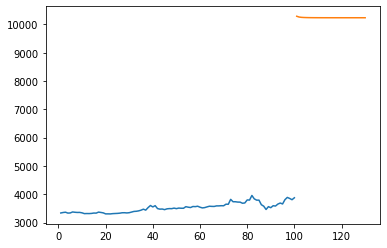

In [492]:
plt.plot(day_new,scaler.inverse_transform(data[1435:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

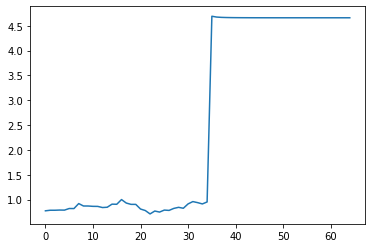

In [493]:
df3=data.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [494]:
df3=scaler.inverse_transform(df3).tolist()

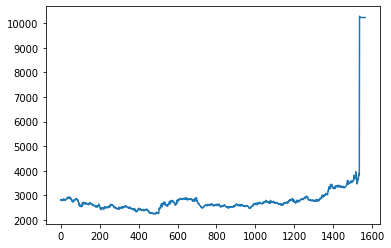

In [495]:
plt.plot(df3)